## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data( )

170500096/170498071 [==============================] - 2s 0us/step


# 資料前處理 -  標準化 及 獨熱編碼(OneHot Encoding)

In [0]:
def preproc_x( x, flatten = True ) :
    x = x / 255.
    if flatten:
        x = x.reshape( ( len(x), -1 ) )
    return x

def preproc_y( y, num_classes = 10 ) :
    if y.shape[ -1 ] == 1:
        y = keras.utils.to_categorical( y, num_classes )
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

# 建立神經網絡

In [5]:
def build_mlp( input_shape, output_units = 10, num_neurons = [ 512, 256, 256, 256, 128 ] ) : 
    
    input_layer = keras.layers.Input( input_shape )
    
    for i, n_units in enumerate( num_neurons ) : 
        if i == 0 :
            x = keras.layers.Dense( units = n_units, 
                                    activation = "relu", 
                                    name = "hidden_layer" + str( i+1 ) )( input_layer )
        else:
            x = keras.layers.Dense( units = n_units, 
                                    activation = "relu", 
                                    name = "hidden_layer" + str( i+1 ) )( x )
    
    output_layer = keras.layers.Dense( units = output_units, 
                                       activation = 'softmax', 
                                       name = 'output_layer' )( x )
    
    model = keras.models.Model( inputs = [ input_layer ], outputs = [ output_layer ] )
    return model

model = build_mlp( input_shape = x_train.shape[ 1: ] ) 
model.summary( )

W0715 14:34:08.058196 140015386150784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 14:34:08.110337 140015386150784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 14:34:08.118610 140015386150784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total para

# 設定超參數

In [0]:
LEARNING_RATE = [ 1e-1, 1e-2, 1e-3, 1e-4, 1e-5 ]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.99

# 訓練模型

In [7]:
results = { }

"""
使用迴圈，建立不同 Learning Rate 的模型並訓練
"""
for lr in LEARNING_RATE :
    keras.backend.clear_session( )    # 清掉舊的 Graph 
    
    print( 'Experiment with LR = %.6f' % (lr) )
    model = build_mlp( input_shape = x_train.shape[ 1: ] )
    model.summary( )
    
    # 優化器(Optimizer)
    optimizer = keras.optimizers.SGD( lr = lr, 
                                      momentum = MOMENTUM, 
                                      nesterov = False 
                                      )
    
    # 執行神經網絡
    model.compile( loss = 'categorical_crossentropy', 
                   optimizer = optimizer, 
                   metrics=["accuracy"] 
                   )

    model.fit( x_train, y_train, 
               epochs = EPOCHS,     
               batch_size = BATCH_SIZE, 
               validation_data = ( x_test, y_test ), 
               shuffle = True
               )
    
    # Collect results
    train_loss = model.history.history[ 'loss' ]
    valid_loss = model.history.history[ 'val_loss' ]
    train_acc = model.history.history[ 'acc' ]
    valid_acc = model.history.history[ 'val_acc' ]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[ exp_name_tag ] = { 'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc
                                }

W0715 14:34:08.257417 140015386150784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0715 14:34:08.259061 140015386150784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 14:34:08.366834 140015386150784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)       

W0715 14:34:08.537979 140015386150784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.2414 - acc: 0.1529 - val_loss: 2.3385 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 12s 248us/step - loss: 2.3197 - acc: 0.1008 - val_loss: 2.3091 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.3107 - acc: 0.0990 - val_loss: 2.3070 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 13s 250us/step - loss: 2.3097 - acc: 0.0977 - val_loss: 2.3057 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.3130 - acc: 0.1000 - val_loss: 2.3058 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.3088 - acc: 0.0992 - val_loss: 2.3085 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 12s 249us/step - loss: 2.3100 - acc: 0.0977 - val_loss: 2.

# 損失函數及準確率

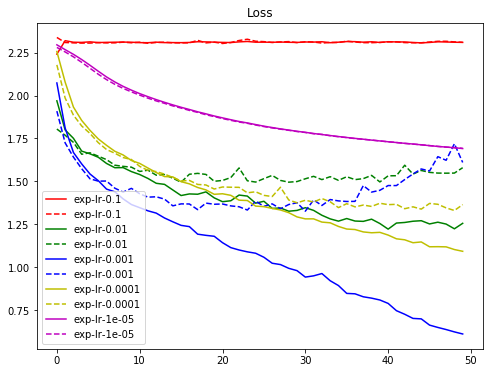

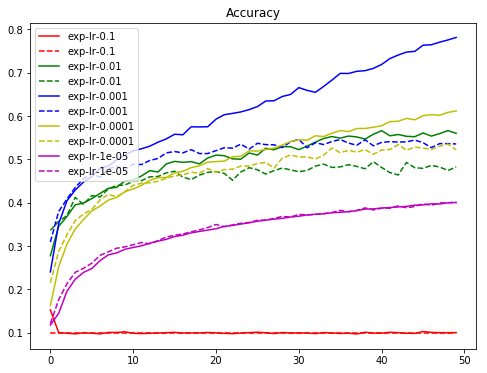

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = [ 'r', 'g', 'b', 'y', 'm', 'k' ]

plt.figure( figsize = ( 8, 6 ) )
for i, cond in enumerate( results.keys( ) ) :
    plt.plot( range( len(results[ cond ][ 'train-loss' ] ) ), results[ cond ][ 'train-loss' ], '-', label = cond, color = color_bar[i] )
    plt.plot( range( len(results[ cond ][ 'valid-loss' ] ) ), results[ cond ][ 'valid-loss' ], '--', label = cond, color = color_bar[i] )
plt.title( 'Loss' )
plt.legend( )
plt.show( )

plt.figure( figsize = ( 8, 6 ) )
for i, cond in enumerate( results.keys( ) ) :
    plt.plot(range( len( results[ cond ][ 'train-acc' ] ) ), results[ cond ][ 'train-acc' ], '-', label = cond, color = color_bar[i] )
    plt.plot(range( len( results[ cond ][ 'valid-acc' ] ) ), results[ cond ][ 'valid-acc' ], '--', label = cond, color = color_bar[i] )
plt.title( 'Accuracy' )
plt.legend( )
plt.show( )